# 주택가격 회귀 분석

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

 ## 데이터수집

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 데이터 준비 및 탐색

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
boston_df.shape

(506, 13)

In [8]:
boston_df['PRICE'] = boston.target

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 분석 모델 구축

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# train, test 분리해서 4개 data로

In [13]:
Y = boston_df['PRICE'] # 정답
X = boston_df.drop(['PRICE'], axis=1, inplace=False) # 문제

In [14]:
# 훈련용 데이터와 평가용 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [15]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [16]:
# 모델 객체 생성
lr = LinearRegression()

In [17]:
# 공부시키고
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
# 예측하고
Y_predict = lr.predict(X_test)

In [19]:
Y_predict[:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

In [20]:
Y_test

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: PRICE, Length: 152, dtype: float64

## 결과 분석

In [21]:
# 정확도 계산
mse = mean_squared_error(Y_test, Y_predict)
mse # mean squared error

17.29691590790215

In [22]:
rmse = np.sqrt(mse)
rmse # root mean squared error

4.158956107955715

In [23]:
r2_score(Y_test, Y_predict) # r2 variance score

0.7572263323138921

In [24]:
# 절편과 회귀계수를 찍어보자.
lr.intercept_ # 절편

40.995595172164336

In [25]:
lr.coef_ # 회귀계수

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [26]:
np.round(lr.coef_, 1) # 보기 편하게 소수점 첫째자리까지

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [27]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [28]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef
# series로 넣는 이유? => 정렬했을 때, index 같이 따라옴

CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64

In [29]:
coef.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

In [30]:
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [31]:
coef.sort_index()

AGE         0.01
B           0.01
CHAS        3.05
CRIM       -0.11
DIS        -1.74
INDUS       0.03
LSTAT      -0.57
NOX       -19.80
PTRATIO    -0.92
RAD         0.36
RM          3.35
TAX        -0.01
ZN          0.07
dtype: float64

In [32]:
coef.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [33]:
coef.values

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])

## 시각화

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

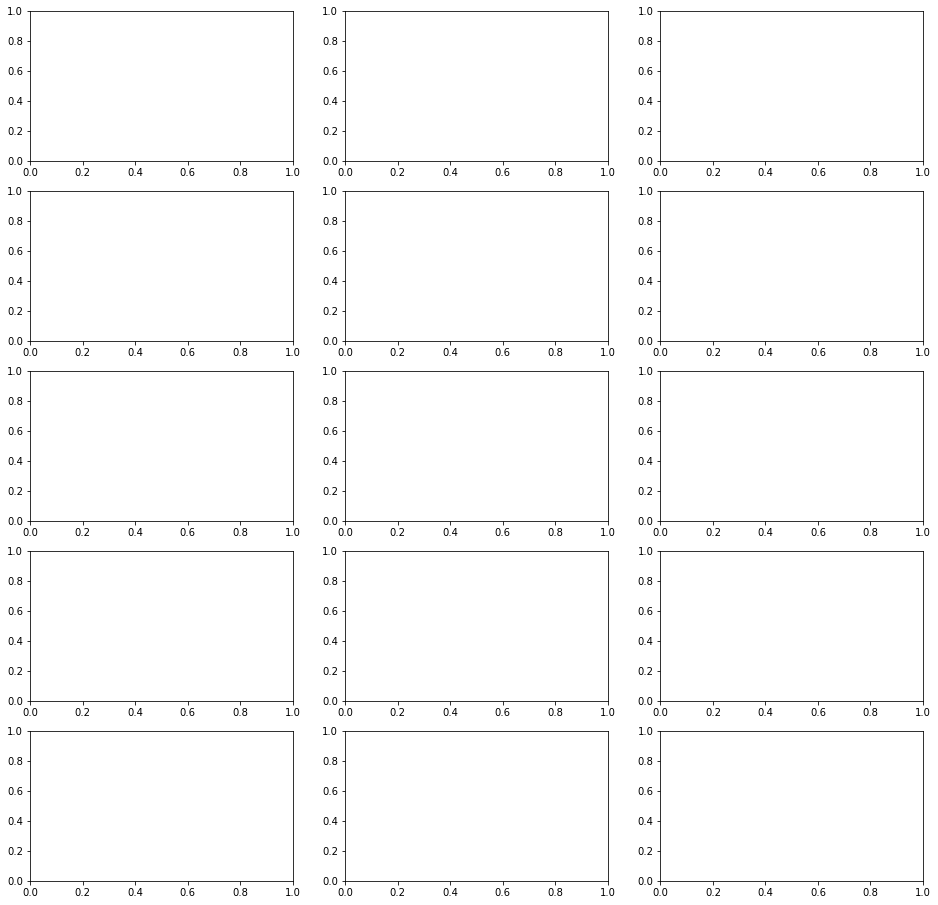

In [35]:
# 16x16 사이즈에 5행3열 subplots
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

In [36]:
X_train.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [53]:
X_features = X_train.columns.to_list()
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12


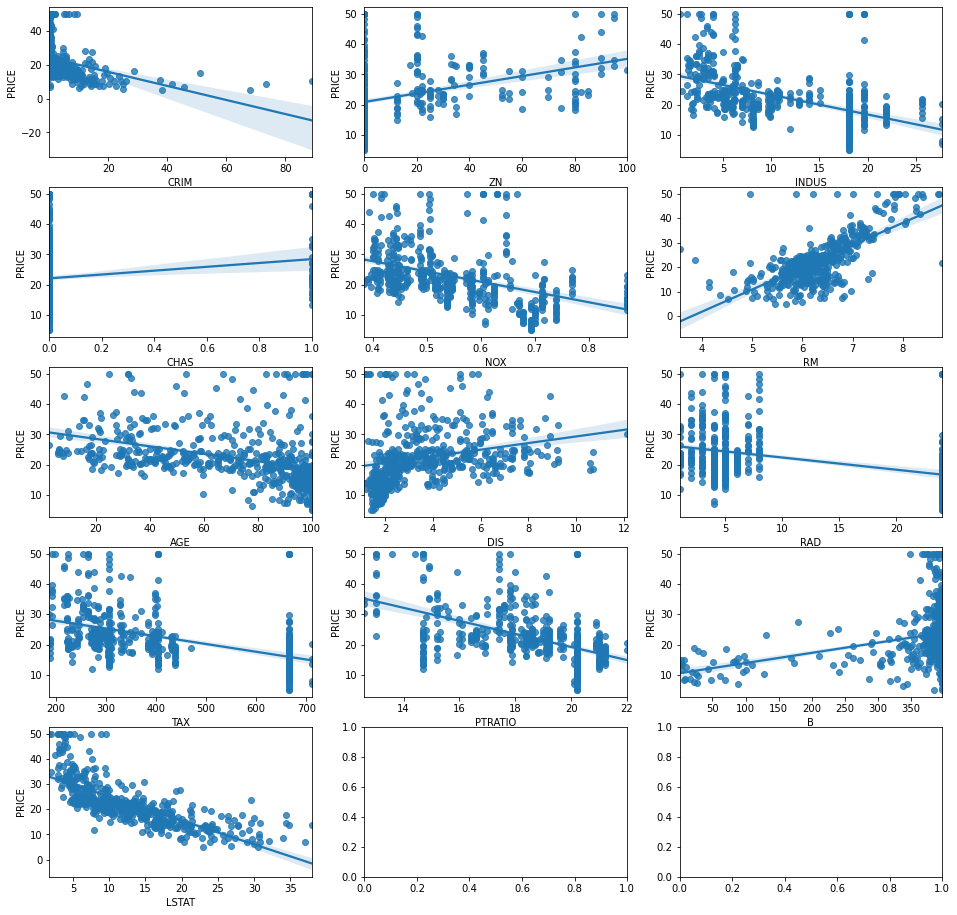

In [58]:
# 16x16 사이즈에 5행3열 subplots
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)
for i, feature in enumerate(X_features): # i: 0부터 시작 enumerate: "세다"
    print("i: ", i)
    row = int(i/3)
    col = i % 3
    # sns.regplot(x=feature, y='PRICE', data=boston_df, ax[0][0])
    # regression line plot
    # data: 가져올 데이터, y: 가져올 데이터의 컬럼명
    # ax[i][j]: 들어갈 위치 (i행, j열)
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax = axs[row][col])

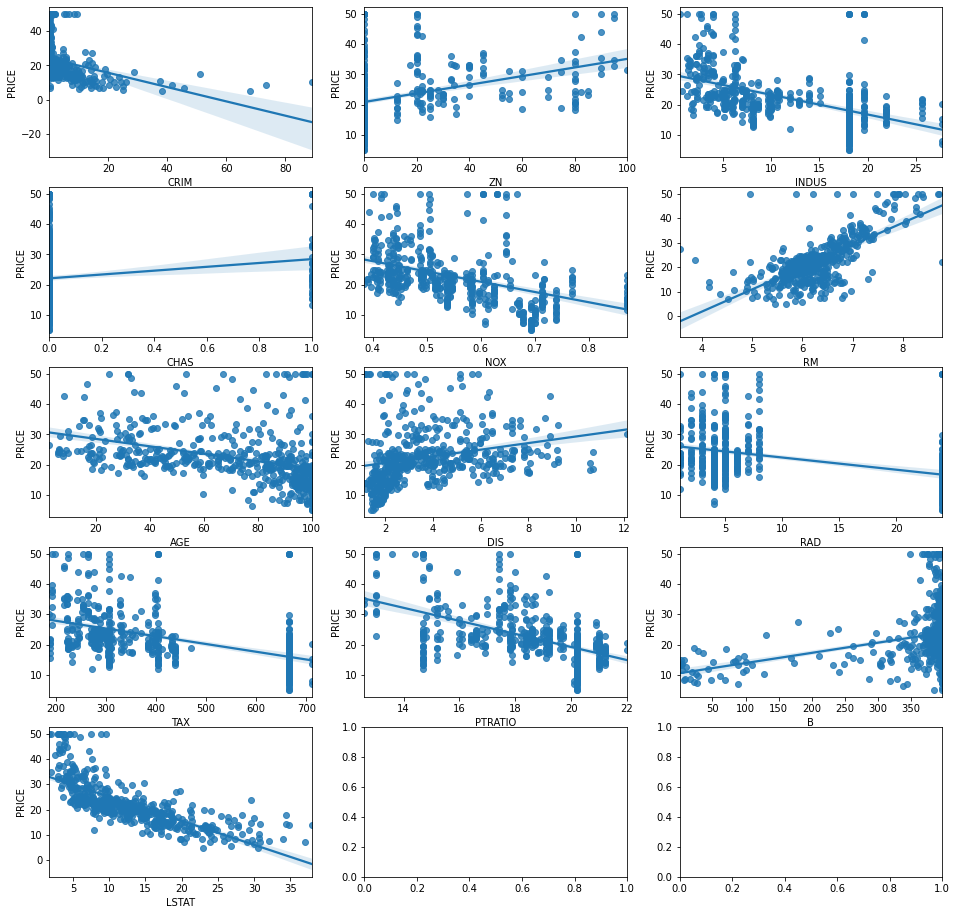

In [55]:
# 16x16 사이즈에 5행3열 subplots
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [43]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [44]:
lr.predict([[0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1]])

array([43.25278829])

In [45]:
train_predict = lr.predict(X_train)

In [50]:
r2_score(Y_train, train_predict)

0.7273505005599823

In [51]:
mse = mean_squared_error(Y_train, train_predict)
mse

24.42999235657573

In [52]:
rmse = np.sqrt(mse)
rmse

4.942670569295078

In [59]:
one_person = input('CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT')
one_person

CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1


'0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1'

In [70]:
data = map(float, one_person.split(', '))
data2 = list(data)

In [71]:
use_data = [data2]
use_data

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [72]:
lr.predict(use_data)

array([43.25278829])

## + AI Service Flow ("집값예측")

In [76]:
CRIM = input('CRIM>> ')
ZN = input('ZN>> ')
INDUS = input('INDUS>> ')
CHAS = input('CHAS>> ')
NOX = input('NOX>> ')
RM = input('RM>> ')
AGE = input('AGE>> ')
DIS = input('DIS>> ')
RAD = input('RAD>> ')
TAX = input('TAX>> ')
PTRATIO = input('PTRATIO>> ')
B = input('B>> ')
LSTAT = input('LSTAT>> ')

CRIM>> 0.001
ZN>> 15
INDUS>> 1
CHAS>> 0
NOX>> 0.59
RM>> 5
AGE>> 10
DIS>> 0
RAD>> 1
TAX>> 10
PTRATIO>> 5
B>> 100
LSTAT>> 1


In [79]:
data = [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
data2 = list(map(float, data))
use_data.append(data2)

In [80]:
use_data

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0],
 [0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [81]:
lr.predict(use_data)

array([43.25278829, 43.25278829])

In [82]:
data_list = [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
len(data_list)

13

In [84]:
# float으로 변환하여 2차원으로 변형하여 predict!

data_list2 = [list(map(lambda x: float(x), data_list))]
data_list2

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [85]:
lambda x: float(x), data_list

(<function __main__.<lambda>(x)>,
 ['0.001', '15', '1', '0', '0.59', '5', '10', '0', '1', '10', '5', '100', '1'])

In [86]:
map(lambda x: float(x), data_list)

In [88]:
cast_list = [list(map(lambda x: float(x), data_list))]
cast_list

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [89]:
lr.predict(cast_list)

array([43.25278829])